In [1]:
!pip install konlpy
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import time
import os
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from konlpy.tag import Kkma, Hannanum, Komoran, Mecab, Twitter
from emoji import core
Twitter = Twitter()
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()

/usr/local/lib/python3.8/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
! apt-get install fonts-nanum*
!pip install matplotlib
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf  
from matplotlib import font_manager
font_dirs = ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20180306-3).
fonts-nanum-coding is already the newest version (2.5-2).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading sta

<ipython-input-3-c23a25cab0a9>:9: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
with open('/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/4점대.txt', 'r', encoding='utf-8') as f:
    text = f.read()
okt = Okt()
nouns = okt.nouns(text) 
words = [n for n in nouns if len(n) > 1] 

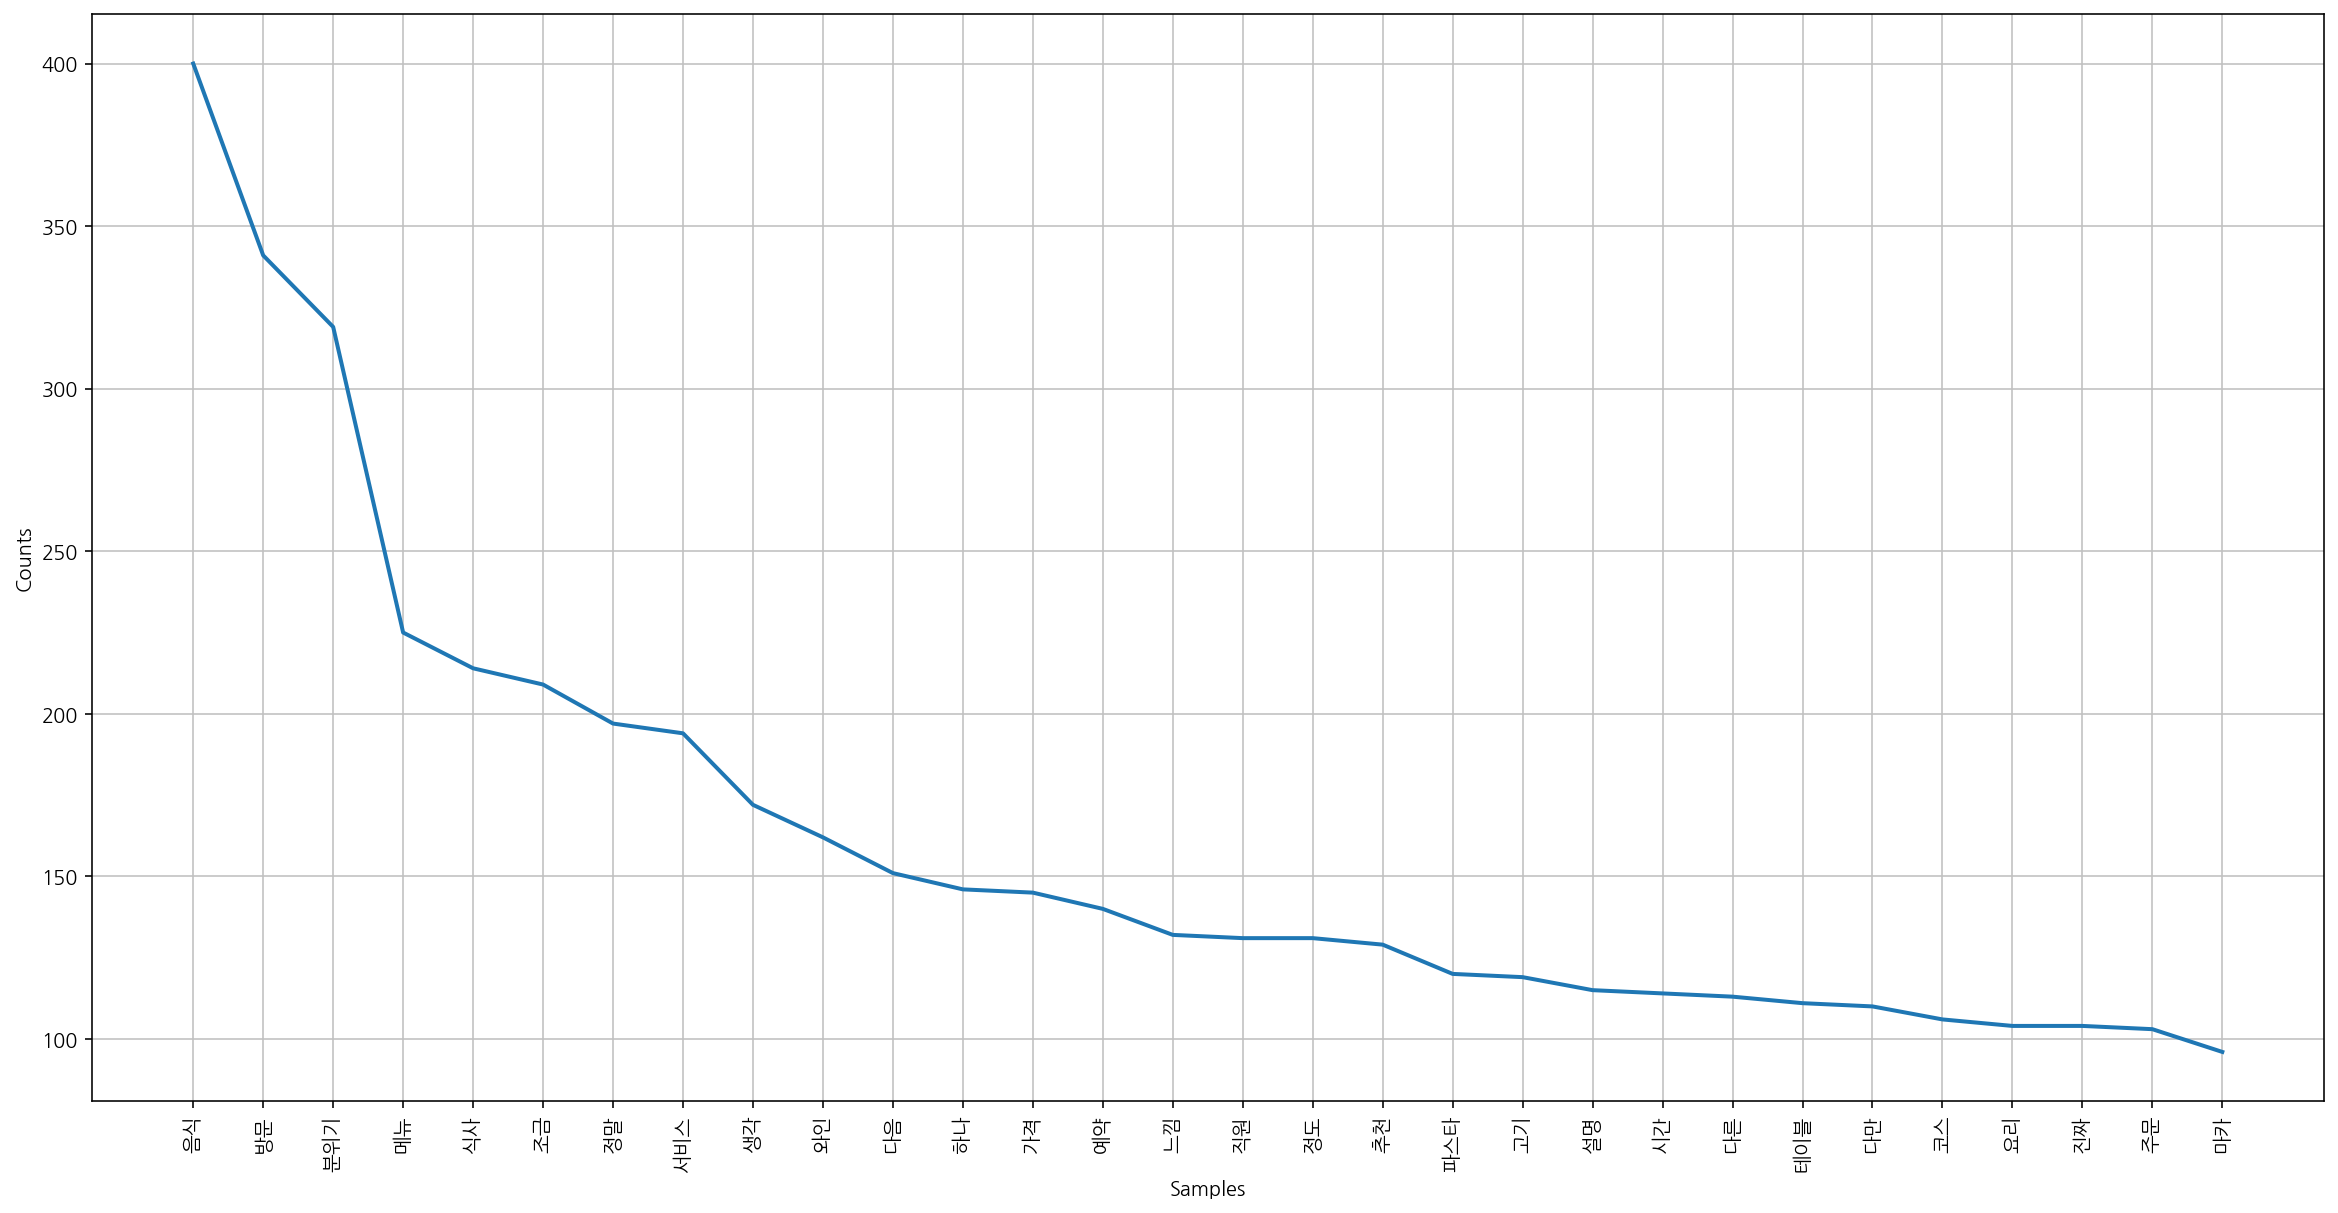

In [6]:
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
from matplotlib import font_manager

%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 
#mpl.font_manager._rebuild()

plt.figure(figsize=(20,10))
words = nltk.Text(words, name='단어 빈도수')
words.plot(30)
plt.show()

In [18]:
stopword = ['방문','정말', '하나', '식사', '다음', '예약', '진짜','음식','마카','파스타','고기','스시','스테이크','초밥']
text = [i for i in words if i not in stopword]
text_cnt = Counter(text)

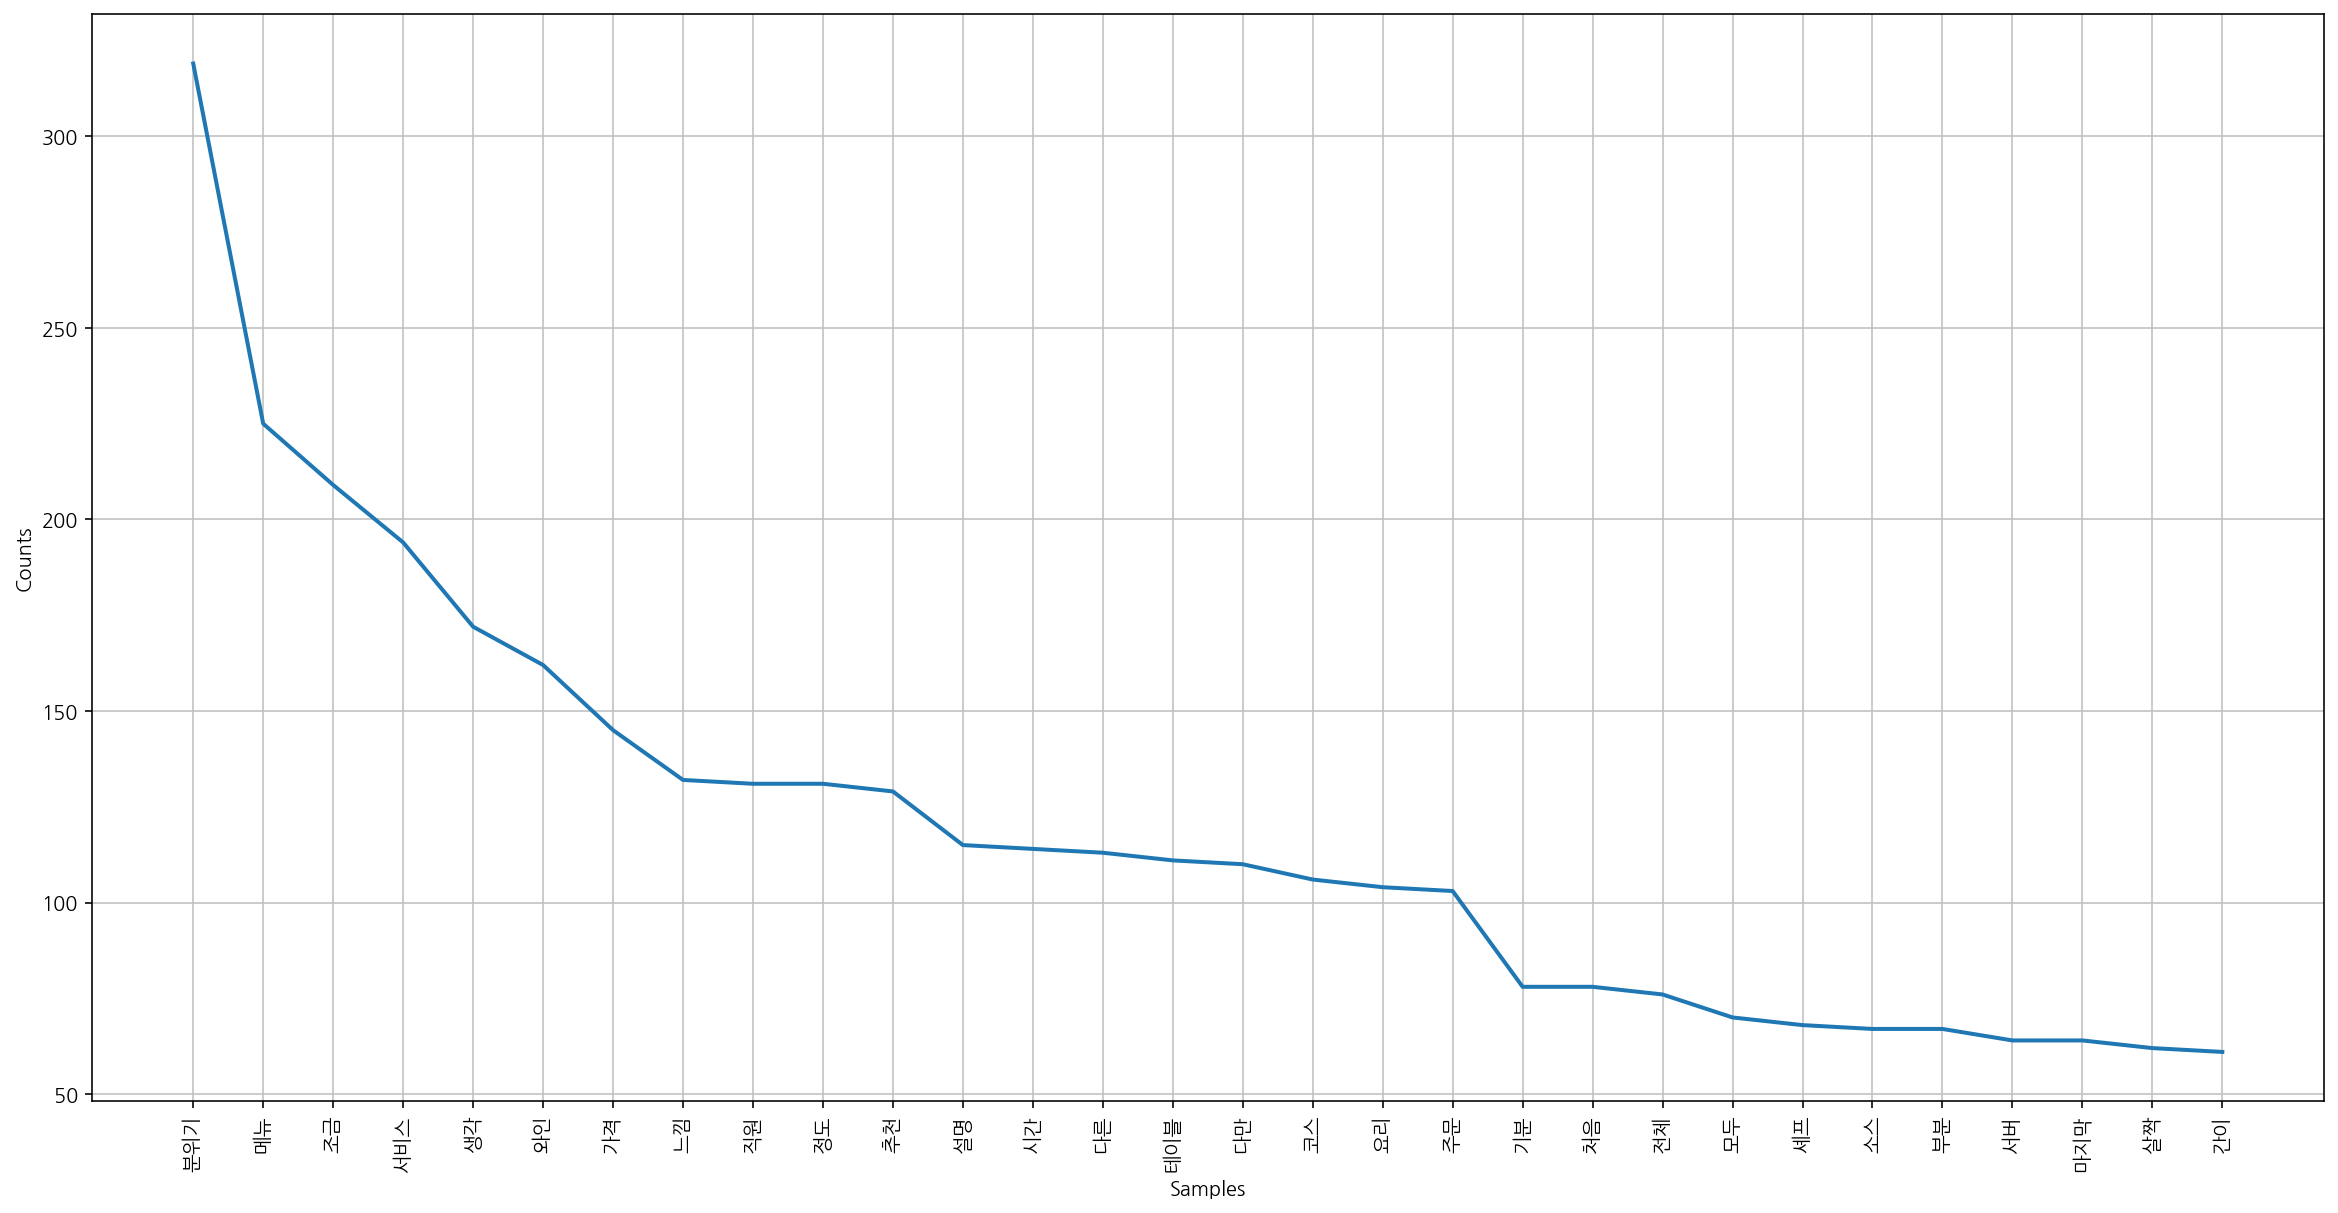

In [19]:
%config InlineBackend.figure_format = 'retina'
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumGothic') 
#mpl.font_manager._rebuild()

plt.figure(figsize=(20,10))
words = nltk.Text(text, name='단어 빈도수')
words.plot(30)
plt.show()

In [20]:
# wordcloud = WordCloud(font_path = fontpath, 
#                       background_color='white',
#                       # colormap = "Accent_r", 
#                       # mask = img_mask, 
#                       random_state = 20, 
#                       max_words = 200).generate_from_frequencies(text_cnt)

# plt.figure(figsize = (10, 10))
# plt.imshow(wordcloud, interpolation = "bilinear")        
# plt.axis("off")

# plt.savefig("/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/wordcloud.png")
# plt.show()

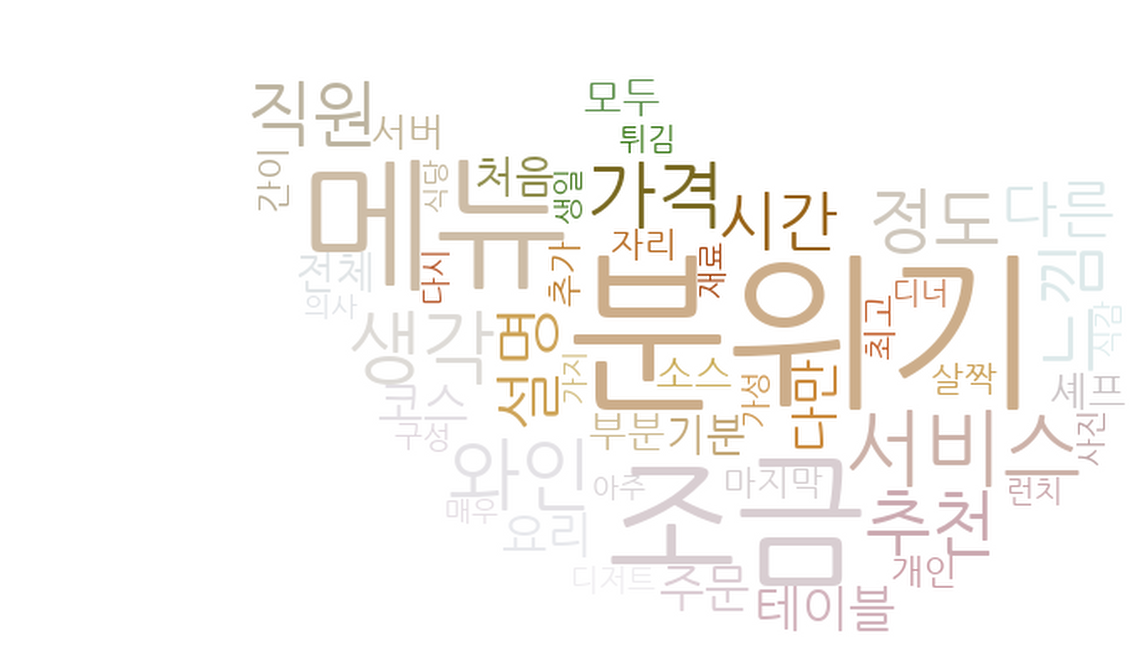

In [21]:
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS 
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

stopwords = set(STOPWORDS)    
icon = Image.open('/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/word.png')    # 마스크가 될 이미지 불러오기 
# plt.imshow(icon)
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
# img_mask = np.array(Image.open("/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/word.png")) 
image_colors = ImageColorGenerator(mask)
stopwords = set(STOPWORDS)    
FONTPATH =  "NanumGothic.ttf"

wordcloud = WordCloud(max_font_size = 100, max_words = 50, background_color='white', stopwords=stopwords, random_state=10, mask=mask, color_func=image_colors, font_path = FONTPATH)
wc = wordcloud.generate_from_frequencies(text_cnt)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "lanczos")
plt.axis("off")
plt.show()

In [22]:
# icon = Image.open('/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/word.png')    # 마스크가 될 이미지 불러오기 
# plt.imshow(icon)

# mask = Image.new("RGB", icon.size, (255,255,255))
# mask.paste(icon,icon)
# mask = np.array(mask)

In [12]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
명사빈도분석석
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        # sentences = core.replace_emoji(sentences,replace='')
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sentence = core.replace_emoji(sentence,replace='')
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in N_POS:
            filtered.append(part[0])             
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/4점대.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

UnicodeDecodeError: ignored

In [ ]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sentence = core.replace_emoji(sentence,replace='')
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in V_POS:
          filtered.append(part[0]+"다") # 다가 필요한 경우      
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/4점대.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()

In [ ]:
"""
문서로부터 주요 품사 고빈도 어휘 출력
"""
   
def split_sentences(content):    # 하나의 문서를 여러문장으로 나누기
    import re    
    all_sentences = []    
    lines = [line for line in content.strip().splitlines() if line.strip()]
    
    for line in lines:
        sentences = re.split("(?<=[.?!])\s+", line)
        all_sentences += sentences
    
    return all_sentences



def get_sentences(input_file_name):  #파일 불러오기
    
    sentences = []
    
    with open(input_file_name, "r", encoding="utf-8") as input_file:
        for sentence in input_file:
            sentence = core.replace_emoji(sentence,replace='')
            sub_sentences = split_sentences(sentence)  # 호출
            sentences += sub_sentences
    
    return sentences



def get_parts(sentences):   #코로란 형태소 분석기 실행
    
    from konlpy.tag import Komoran
    
    komoran = Komoran()
    results = []
    
    for sentence in sentences:
        parts = komoran.pos(sentence)
        for part in parts:
            results.append(part)
    
    return results


def filtered_parts(parts): # 주요품사만 추출
    
    N_POS = ["NNG", "NNP"]  # NNG : 일반명사, NNP : 고유명사
    V_POS = ["VV", "VA"]    # "VV" : 동사, "VA" : 형용사
    X_POS = ["XR"]          # "XR" : 어근
    M_POS = ["MAG", "MAJ"]   # "MAG": 일반부사, "MAJ" : 접속부사
    
    filtered = []
    
    for part in parts:
        if part[1] in M_POS:
          filtered.append(part[0])               
    return filtered


def word_count(filtered):    #빈도 체크하고 정렬
    from collections import Counter    
    wordform_counter = Counter()

    for word in filtered:
        wordform_counter[word] += 1    
   # most_common() 순서대로 보여줌
    for word, count in wordform_counter.most_common(10):  # most_common(10) 10개 추출
        print("{}: {}".format(word, count))    
    
def main():
    input_file_name = "/content/drive/MyDrive/캐치테이블 리뷰 크롤링 및 텍스트데이터분석/4점대.txt"
    sentences = get_sentences(input_file_name)     
    parts = get_parts(sentences)     
    filtered = filtered_parts(parts)     
    word_count(filtered)     


main()